# 우리나라 대표 반도체 기업 주가 예측 

In [ ]:
!pip install finance-datareader
!pip install ta-lib

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
 # notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것 
%matplotlib inline 
warnings.filterwarnings('ignore') #ignore warnings message

plt.rcParams['font.family'] = 'NanumGothic'

In [27]:
import talib as ta
import FinanceDataReader as fdr

# 주가 관련 라이브러리

In [248]:
SK = fdr.DataReader(symbol='000660', start='20100101') # SK하이닉스 불러오기
samsung = fdr.DataReader(symbol='005930', start='20100101') # 삼성전자 불러오기

In [249]:
SK.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-11-29,82700,83800,82100,83700,1501783,0.007220
2022-11-30,83200,85400,83100,85000,3332708,0.015532
2022-12-01,87300,87300,84600,84700,2878591,-0.003529
2022-12-02,83900,83900,81800,81900,4594058,-0.033058
2022-12-05,81900,82300,80700,81000,3218558,-0.010989


In [250]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-11-29,59900,60600,59800,60600,7014160,0.008319
2022-11-30,60400,62200,60200,62200,19768903,0.026403
2022-12-01,63100,63200,62300,62600,16631445,0.006431
2022-12-02,62500,62500,60400,60400,15331184,-0.035144
2022-12-05,60900,61100,60000,60300,12627965,-0.001656


In [251]:
samsung['RSI']=ta.RSI(samsung['Close'],timeperiod=14)
samsung['MACD'] = ta.MACD(samsung['Close'], fastperiod=12, slowperiod=26, signalperiod=9)[0]
#단기이평12일과 26일의 차이를 9일간 지수평균으로 산출한 것. 
#두시그널이 교차할때 단, 장기 이평선의 차이가 가장 크므로 매수, 매도타이밍으로 간주함.
ubb, mbb, lbb = ta.BBANDS(samsung['Close'], 20, 2)
samsung['ubb'] = ubb #하한밴드
samsung['mbb'] = mbb #중심밴드
samsung['lbb'] = lbb #상한밴드
#볼린저 밴드의 윗선은 저항선이며, 아랫선은 지지선으로 본다. 
#20일선(중간선)은 지지 혹은 저항선으로 경우에 따라 해석한다. 지지선에서 매수하고 저항선에서 매도.
#볼린저 밴드의 폭이 좁아지는 경우, 상하방으로 큰 폭의 움직임이 있을 것으로 해석
a,b=ta.STOCH(high=samsung['High'],low=samsung['Low'],close=samsung['Close'],
                             fastk_period=3,slowk_period=1,slowd_period=1)
samsung['STOCH'] = a
#스토캐스틱이 50이상이면 상승추세, 50이하이면 하락추세
#다이버전스 상황이라는 주가와 스토캐스틱이 반대로 움직이는 특수한 경우가 있긴함.
#%K곡선(주가수준)과  %D(이동편균선)이 가까울수록 신뢰도가 높음
samsung['ADX']=ta.ADX(high=samsung['High'],low=samsung['Low'],close=samsung['Close'],timeperiod=14)
#매수매도세 확인
samsung=samsung.dropna()

In [252]:
SK['RSI']=ta.RSI(SK['Close'],timeperiod=14)
SK['MACD'] = ta.MACD(SK['Close'], fastperiod=12, slowperiod=26, signalperiod=9)[0]
#단기이평12일과 26일의 차이를 9일간 지수평균으로 산출한 것. 
#두시그널이 교차할때 단, 장기 이평선의 차이가 가장 크므로 매수, 매도타이밍으로 간주함.
ubb, mbb, lbb = ta.BBANDS(SK['Close'], 20, 2)
SK['ubb'] = ubb #하한밴드
SK['mbb'] = mbb #중심밴드
SK['lbb'] = lbb #상한밴드
#볼린저 밴드의 윗선은 저항선이며, 아랫선은 지지선으로 본다. 
#20일선(중간선)은 지지 혹은 저항선으로 경우에 따라 해석한다. 지지선에서 매수하고 저항선에서 매도.
#볼린저 밴드의 폭이 좁아지는 경우, 상하방으로 큰 폭의 움직임이 있을 것으로 해석
a,b=ta.STOCH(high=SK['High'],low=SK['Low'],close=SK['Close'],
                             fastk_period=3,slowk_period=1,slowd_period=1)
SK['STOCH'] = a
#스토캐스틱이 50이상이면 상승추세, 50이하이면 하락추세
#다이버전스 상황이라는 주가와 스토캐스틱이 반대로 움직이는 특수한 경우가 있긴함.
#%K곡선(주가수준)과  %D(이동편균선)이 가까울수록 신뢰도가 높음
SK['ADX']=ta.ADX(high=SK['High'],low=SK['Low'],close=SK['Close'],timeperiod=14)
#매수매도세 확인
SK=SK.dropna()

In [253]:
print(SK.shape)
print(samsung.shape)

(3157, 13)
(3157, 13)


#### SK 하이닉스 (2010~) 전체 ,3년 단위 주식가격 그래프

Text(0, 0.5, 'price')

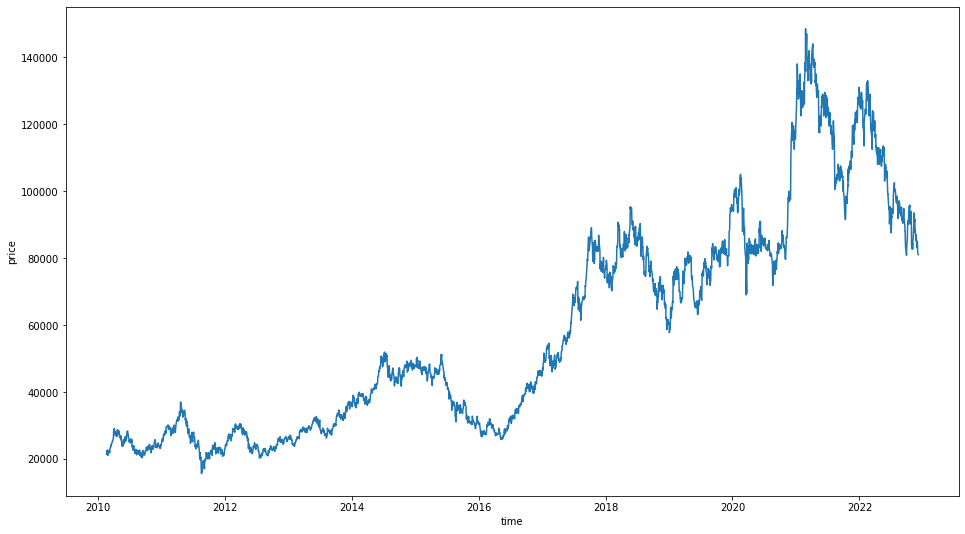

In [254]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=SK['Close'], x=SK.index)
plt.xlabel('time')
plt.ylabel('price')

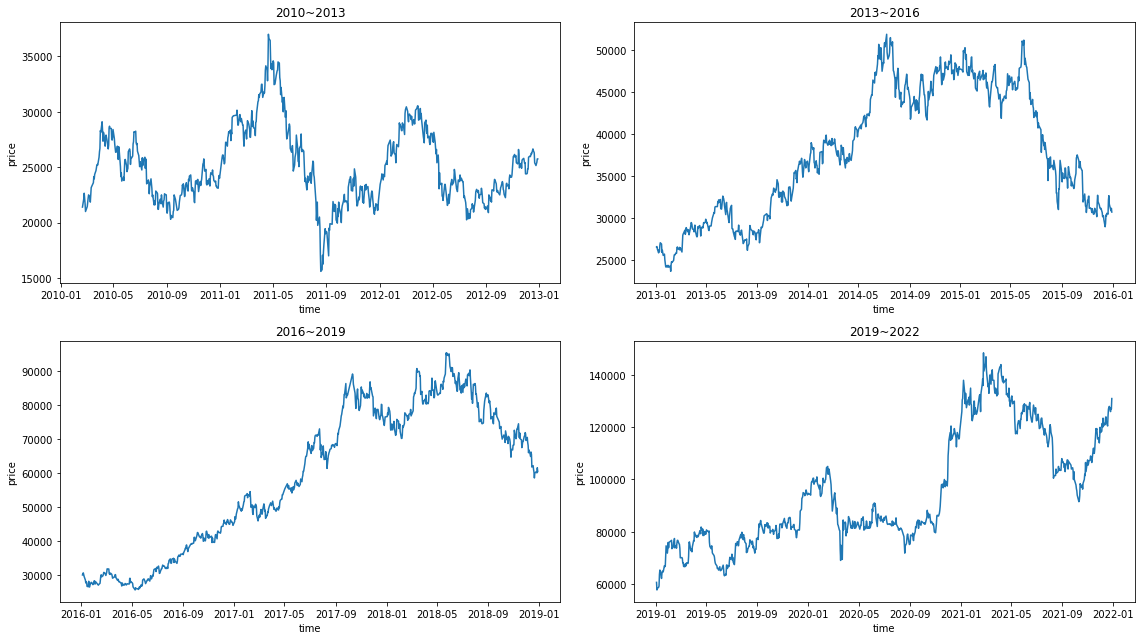

In [255]:
time_steps = [['2010', '2013'], 
              ['2013', '2016'], 
              ['2016', '2019'], 
              ['2019', '2022']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = SK.loc[(SK.index > time_steps[i][0]) & (SK.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

#### 삼성전자 (2010~) 전체 ,3년 단위 주식가격 그래프

Text(0, 0.5, 'price')

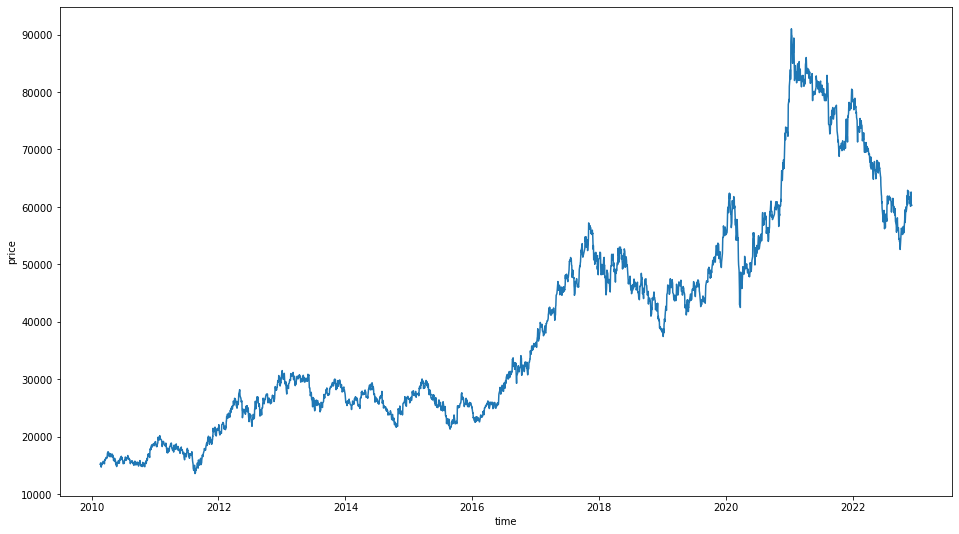

In [256]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=samsung['Close'], x=samsung.index)
plt.xlabel('time')
plt.ylabel('price')

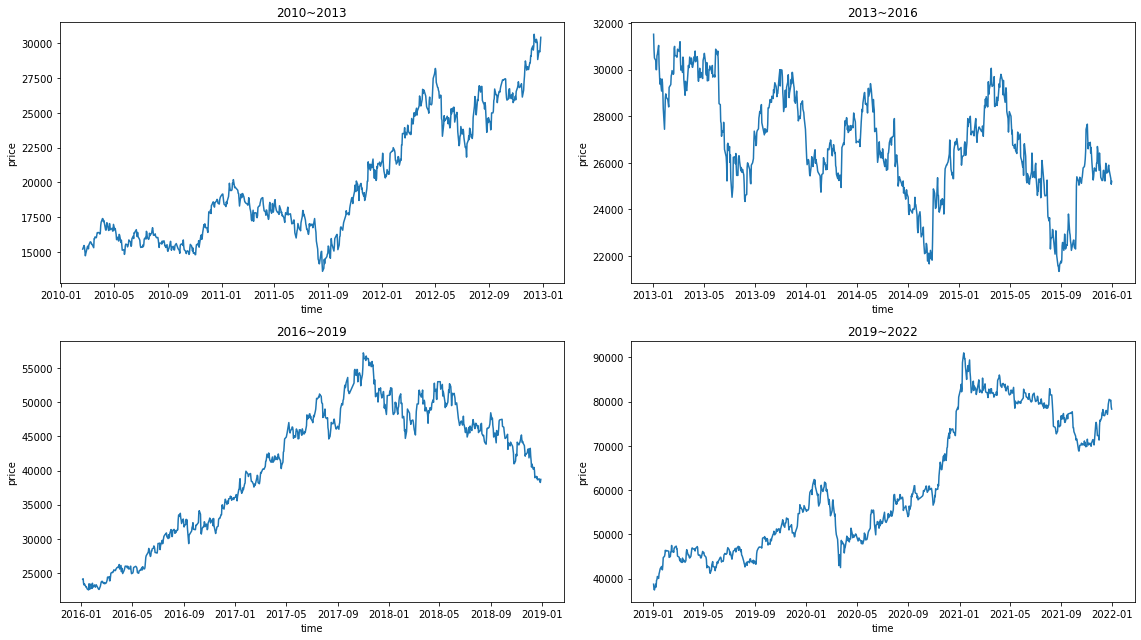

In [257]:
time_steps = [['2010', '2013'], 
              ['2013', '2016'], 
              ['2016', '2019'], 
              ['2019', '2022']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = samsung.loc[(samsung.index > time_steps[i][0]) & (samsung.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [258]:
SK.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'RSI', 'MACD',
       'ubb', 'mbb', 'lbb', 'STOCH', 'ADX'],
      dtype='object')

In [259]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'RSI', 'MACD',
       'ubb', 'mbb', 'lbb', 'STOCH', 'ADX']
# 스케일 후 columns
SK_scaled = scaler.fit_transform(SK[scale_cols])
SK_scaled

samsung_scaled = scaler.fit_transform(samsung[scale_cols])
samsung_scaled

array([[0.17032115, 0.16053719, 0.16960894, ..., 0.02521003, 0.04536713,
        0.27227062],
       [0.1709856 , 0.1607438 , 0.17206704, ..., 0.025773  , 0.63513986,
        0.26418146],
       [0.17142857, 0.15991736, 0.16892737, ..., 0.02783557, 0.50017007,
        0.27083627],
       ...,
       [0.69878184, 0.65289256, 0.69608939, ..., 0.67819631, 0.8219457 ,
        0.17407115],
       [0.69213732, 0.64566116, 0.67486034, ..., 0.68137181, 0.06653846,
        0.1578997 ],
       [0.6744186 , 0.63119835, 0.67039106, ..., 0.68164755, 0.09356971,
        0.13853913]])

In [260]:
SK_scaled = pd.DataFrame(SK_scaled, columns=scale_cols)
samsung_scaled = pd.DataFrame(samsung_scaled, columns=scale_cols)

## SK 하이닉스의 주가 예측

In [261]:
TEST_SIZE = 200
WINDOW_SIZE = 20

train = SK_scaled[:-TEST_SIZE]
test = SK_scaled[-TEST_SIZE:]

In [262]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [263]:
from sklearn.model_selection import train_test_split

feature_cols = ['Open', 'High', 'Low', 'Volume', 'Change', 'RSI', 'MACD',
       'ubb', 'mbb', 'lbb', 'STOCH', 'ADX']

label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((2349, 20, 12), (588, 20, 12))

In [264]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((200, 12), (200, 1))

In [265]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 12), (180, 1))

In [266]:
x_train

array([[[0.11936937, 0.11997019, 0.12677165, ..., 0.11707252,
         0.77272727, 0.22791689],
        [0.1265015 , 0.13040238, 0.13385827, ..., 0.11769816,
         0.97727273, 0.25086987],
        [0.13438438, 0.13338301, 0.14251969, ..., 0.11927958,
         0.98076923, 0.27702319],
        ...,
        [0.12912913, 0.12853949, 0.13582677, ..., 0.14459463,
         0.64      , 0.26597391],
        [0.13438438, 0.13338301, 0.14251969, ..., 0.14680412,
         0.8       , 0.2418347 ],
        [0.13250751, 0.13412817, 0.14015748, ..., 0.149458  ,
         0.64516129, 0.22366869]],

       [[0.62987988, 0.62220566, 0.64409449, ..., 0.56085079,
         0.33333333, 0.75353809],
        [0.62162162, 0.63487332, 0.6480315 , ..., 0.57494884,
         0.76190476, 0.76142116],
        [0.65465465, 0.69448584, 0.68897638, ..., 0.57962328,
         0.95901639, 0.78896219],
        ...,
        [0.72972973, 0.74292101, 0.76377953, ..., 0.71281131,
         0.63636364, 0.9054648 ],
        [0.7

In [267]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, Lambda
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [268]:
model = Sequential([
    # 1차원 feature map 생성합니다. filters는 32로, kernel_size는 5로 지정해주세요.
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[train_feature.shape[1], train_feature.shape[2]]),
    # LSTM과 Dense 레이러를 사용해주세요. 활성함수는 각각 tanh와 relu로 지정합니다.
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 20, 32)            1952      
                                                                 
 lstm_12 (LSTM)              (None, 16)                3136      
                                                                 
 dense_21 (Dense)            (None, 16)                272       
                                                                 
 dense_22 (Dense)            (None, 1)                 17        
                                                                 
Total params: 5,377
Trainable params: 5,377
Non-trainable params: 0
_________________________________________________________________


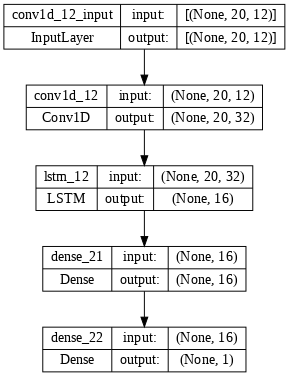

In [269]:
keras.utils.plot_model(model, show_shapes=True, dpi=70 )

In [271]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

history = model.fit(x_train, y_train, 
                                    epochs=50, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/50
145/147 [============================>.] - ETA: 0s - loss: 0.0045
Epoch 1: val_loss improved from inf to 0.00098, saving model to model/tmp_checkpoint.h5
147/147 [==============================] - 5s 16ms/step - loss: 0.0044 - val_loss: 9.7835e-04
Epoch 2/50
147/147 [==============================] - ETA: 0s - loss: 4.6154e-04
Epoch 2: val_loss improved from 0.00098 to 0.00040, saving model to model/tmp_checkpoint.h5
147/147 [==============================] - 2s 15ms/step - loss: 4.6154e-04 - val_loss: 4.0194e-04
Epoch 3/50
143/147 [============================>.] - ETA: 0s - loss: 3.4717e-04
Epoch 3: val_loss improved from 0.00040 to 0.00032, saving model to model/tmp_checkpoint.h5
147/147 [==============================] - 2s 14ms/step - loss: 3.4564e-04 - val_loss: 3.1944e-04
Epoch 4/50
143/147 [============================>.] - ETA: 0s - loss: 3.3497e-04
Epoch 4: val_loss did not improve from 0.00032
147/147 [==============================] - 2s 12ms/step - loss: 3.3596e

In [272]:
model.load_weights(filename)

In [273]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

6/6 [==============================] - 1s 5ms/step


(180, 1)

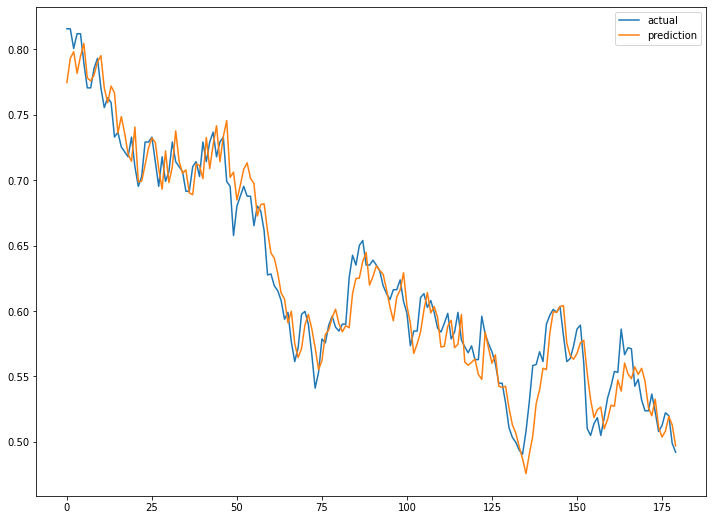

In [274]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

## 삼성전자의 주가 예측

In [277]:
TEST_SIZE = 200
WINDOW_SIZE = 20

train = samsung_scaled[:-TEST_SIZE]
test = samsung_scaled[-TEST_SIZE:]

In [278]:
from sklearn.model_selection import train_test_split

feature_cols = ['Open', 'High', 'Low', 'Volume', 'Change', 'RSI', 'MACD',
       'ubb', 'mbb', 'lbb', 'STOCH', 'ADX']

label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((2349, 20, 12), (588, 20, 12))

In [279]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((200, 12), (200, 1))

In [280]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 12), (180, 1))

In [281]:
x_train

array([[[0.22613511, 0.21590909, 0.22793296, ..., 0.08210481,
         0.99807692, 0.33809583],
        [0.23145072, 0.21590909, 0.21988827, ..., 0.08439867,
         0.37632409, 0.31642282],
        [0.22325581, 0.21260331, 0.22502793, ..., 0.08623001,
         0.45813367, 0.29629789],
        ...,
        [0.22524917, 0.21157025, 0.22659218, ..., 0.10365456,
         0.25876068, 0.19170647],
        [0.22502769, 0.21260331, 0.22592179, ..., 0.10328633,
         0.67869231, 0.19414665],
        [0.22768549, 0.21694215, 0.22927374, ..., 0.10438418,
         0.89571006, 0.17766662]],

       [[0.20575858, 0.19400826, 0.20536313, ..., 0.05152567,
         0.15594952, 0.36499514],
        [0.20552602, 0.19545455, 0.20715084, ..., 0.05287519,
         0.96111111, 0.37532312],
        [0.20841639, 0.20041322, 0.20849162, ..., 0.05373855,
         0.95893665, 0.39716595],
        ...,
        [0.21063123, 0.19834711, 0.21050279, ..., 0.08226851,
         0.15969231, 0.36668143],
        [0.2

In [282]:
model = Sequential([
    # 1차원 feature map 생성합니다. filters는 32로, kernel_size는 5로 지정해주세요.
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[train_feature.shape[1], train_feature.shape[2]]),
    # LSTM과 Dense 레이러를 사용해주세요. 활성함수는 각각 tanh와 relu로 지정합니다.
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 20, 32)            1952      
                                                                 
 lstm_13 (LSTM)              (None, 16)                3136      
                                                                 
 dense_23 (Dense)            (None, 16)                272       
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 5,377
Trainable params: 5,377
Non-trainable params: 0
_________________________________________________________________


In [284]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

history = model.fit(x_train, y_train, 
                                    epochs=50, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/50
146/147 [============================>.] - ETA: 0s - loss: 0.0064
Epoch 1: val_loss improved from inf to 0.00053, saving model to model/tmp_checkpoint.h5
147/147 [==============================] - 7s 18ms/step - loss: 0.0064 - val_loss: 5.2838e-04
Epoch 2/50
147/147 [==============================] - ETA: 0s - loss: 4.8787e-04
Epoch 2: val_loss improved from 0.00053 to 0.00036, saving model to model/tmp_checkpoint.h5
147/147 [==============================] - 2s 13ms/step - loss: 4.8787e-04 - val_loss: 3.6021e-04
Epoch 3/50
145/147 [============================>.] - ETA: 0s - loss: 3.4945e-04
Epoch 3: val_loss improved from 0.00036 to 0.00025, saving model to model/tmp_checkpoint.h5
147/147 [==============================] - 2s 14ms/step - loss: 3.4831e-04 - val_loss: 2.5108e-04
Epoch 4/50
147/147 [==============================] - ETA: 0s - loss: 3.4992e-04
Epoch 4: val_loss improved from 0.00025 to 0.00023, saving model to model/tmp_checkpoint.h5
147/147 [=================

In [285]:
model.load_weights(filename)

In [286]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

6/6 [==============================] - 1s 4ms/step


(180, 1)

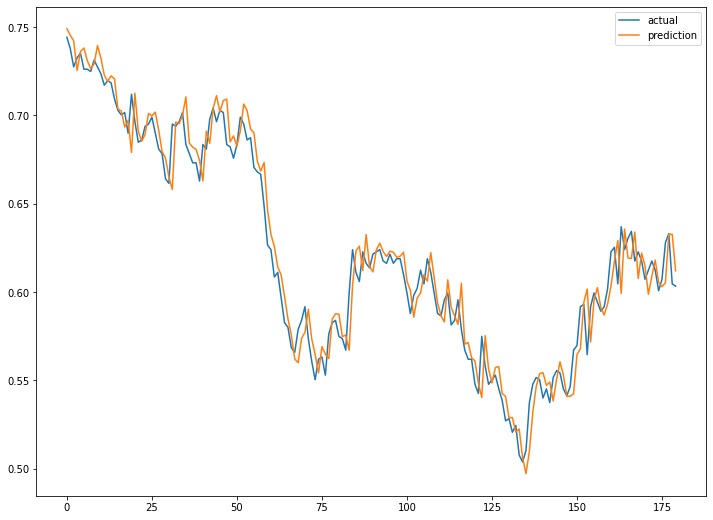

In [287]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()